In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [7]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
import yfinance as yf

# For time stamps
from datetime import datetime

In [9]:
data = pd.read_csv('E:/Data_warehouse/New York Stock Exchange/prices-split-adjusted.csv', delimiter=',', encoding='utf-8')
data['Datetime'] = pd.to_datetime(data['date'])
data.set_index('Datetime', inplace=True)
data

,date,symbol,open,close,low,high,volume
Datetime,,,,,,,
2016-01-05,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
2016-12-30,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0


What is ARIMA?
Autoregressive Integrated Moving Average (ARIMA) Model converts non-stationary data to stationary data before working on it. It is one of the most popular models to predict linear time series data.

ARIMA model has been used extensively in the field of finance and economics as it is known to be robust, efficient and has a strong potential for short-term share market prediction.

In [10]:
data['symbol'].value_counts()

KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

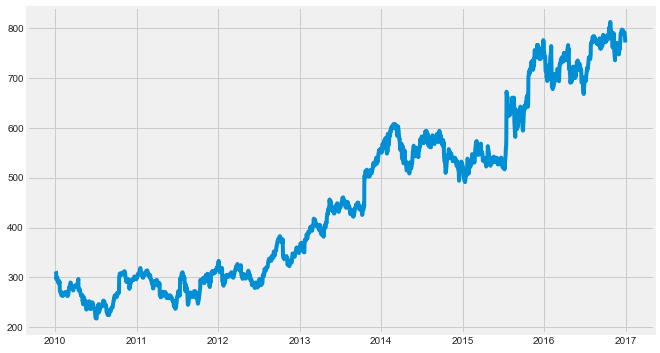

In [11]:
plt.figure(figsize=(10,6))
plt.plot(data[data['symbol']=='GOOG']['close'])

plt.grid(True)
plt.show()

In [12]:
df_1 = data[data['symbol']=='GOOG']
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1762 non-null   object 
 1   symbol  1762 non-null   object 
 2   open    1762 non-null   float64
 3   close   1762 non-null   float64
 4   low     1762 non-null   float64
 5   high    1762 non-null   float64
 6   volume  1762 non-null   float64
dtypes: float64(5), object(2)
memory usage: 110.1+ KB


<AxesSubplot:ylabel='Density'>

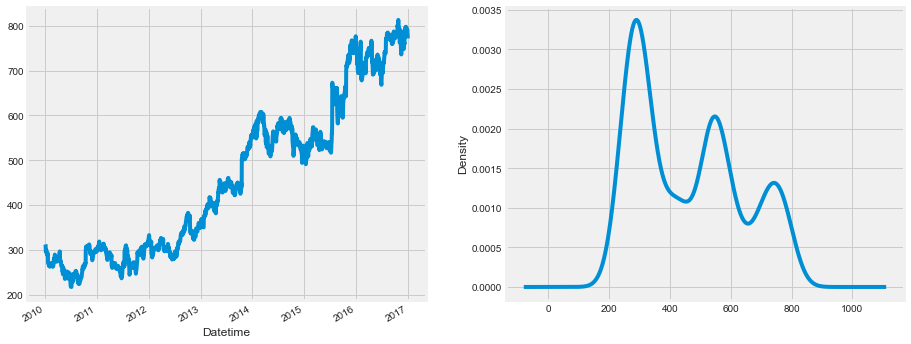

In [13]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
df_1['close'].plot()

ax2 = fig.add_subplot(122)
df_1['close'].plot(kind='kde')

In [14]:
# Also, a given time series is thought consist of three systematic components including level, trend, seasonality, and one non-systematic 
# component called noise.
# Level: the average value in the series.
# Trend: The increasing or decreasing value in the series 
# Seasonality : The repearing short-term cycle in the series 

# If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear of difference 
# stationary. If both mean and standard deviation are flat liness(constant mean and constant variance), the series becomes stationary.


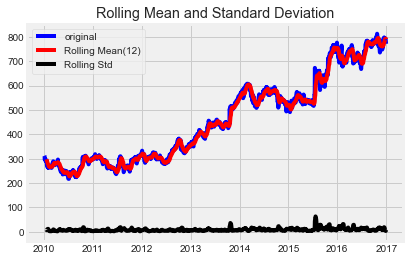

Result of dickey fuller test
Test Statistics                  -0.166842
p-value                           0.942360
No. of lags used                  3.000000
Number of observations used    1758.000000
critical value (1%)              -3.434075
critical value (5%)              -2.863185
critical value (10%)             -2.567646
dtype: float64


In [15]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    # plot rolling statistics 
    plt.plot(timeseries, color='blue', label='original')
    plt.plot(rolmean, color='red', label='Rolling Mean(12)')
    plt.plot(rolstd, color='black', label='Rolling Std') 
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print('Result of dickey fuller test')
    adft = adfuller(timeseries, autolag='AIC')

    output = pd.Series(adft[:4], index=['Test Statistics','p-value','No. of lags used','Number of observations used']) 
    for key, values in adft[4].items():
        output['critical value (%s)'%key] = values
    print(output) 

test_stationarity(df_1['close'])

In [ ]:
# H0 : the series has a unit root  (non-stationary)
# H1 : the series has no unit root 

# p-value is greater than 0.05 so we cannot reject Null hypothesis. Also, the test statistics is greater than the critical values, so the data is 
# non-stationary. 
# In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary
# through this process. So let us separate trend and seasonality from the time series.

In [ ]:
df_close = data['close']
df_close
plt.plot(df_close)

In [ ]:
result = seasonal_decompose(df_1['close'], model='multiplicative', period=30) #multiplicative  additive  # pandas.core.series.Series

# 4개의 attributes 표현하기
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(411)
ax1.plot(result.observed)

ax2 = fig.add_subplot(412)
ax2.plot(result.trend)

ax3 = fig.add_subplot(413)
ax3.plot(result.seasonal)

ax4 = fig.add_subplot(414)
ax4.plot(result.resid)


In [ ]:
result.observed, result.trend, result.seasonal, result.resid

In [ ]:
df_2 = data[data['symbol']=='GOOG']['close']

fig = plt.figure(figsize=(16,8))

df_log = np.log(df_2)
plt.plot(df_log, linewidth=1)

moving_avg = df_log.rolling(12).mean() # 앞에서 부터 12일간의 평균 / 앞 11개의 data는 Nan
std_dev = df_log.rolling(12).std() 

plt.subplot(121)
plt.plot(moving_avg, color='red', label='mean', linewidth=2)
plt.legend(loc='best')
plt.title('moving average')

plt.subplot(122)
plt.plot(std_dev, color='black', label='standard deviation', linewidth=2)
plt.legend(loc='best')
plt.title('moving average')

plt.show()

In [ ]:
# Now we are going to create an ARIMA model and will train it with closing price of the stock on the train data. 
# so let us split the data into training and test set and visualize it. 

demarcation = int(len(df_log)*0.9) # 경계 구분
demarcation
train_data, test_data = df_log[3:demarcation], df_log[demarcation:]
print(train_data.size, test_data.size)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train_data)
plt.plot(test_data)

plt.show()

In [ ]:
# ARIMA : differences d'th order / Auto Regression (Using earlier values Predicting basec on the other factors) / Moving average 
# combines autoregressive and differences 
# Using p time period of previous of data to predict d'th order differences 
# p'th order autoregression
# d'th order differences 
# q'th order moving average 

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                    test='adf',       # use adftest to find optimal 'd'
                    max_p=3, max_q=3, # maximum p and q
                    m=1,              # frequency of series
                    d=None,           # let model determine 'd'
                    seasonal=False,   # No Seasonality
                    start_P=0, 
                    D=0, 
                    trace=True,
                    error_action='ignore',  
                    suppress_warnings=True, 
                    stepwise=True)

print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
# top left : the residual errors seem to fluctuate around a mean zero and have a uniform variance. 
# top right: the density plot suggests normal distribution with mean zero 
# bottom left : All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed 
# bottom right : The correlogram, aka, ACF plot show the residual error are not autocorrelated. Any autocorrelation would imply that there is some 
# pattern in the residual errors which are not explained in the model. So you will need to look for more X's(predictors) ro the model

In [ ]:
model =ARIMA(train_data, order=(0,1,0))  
fitted = mode.fit(train_data)
print(fitte.summary())